In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
        
import gc; gc.enable()

/kaggle/input/ashrae-energy-prediction/building_metadata.csv
/kaggle/input/ashrae-energy-prediction/weather_train.csv
/kaggle/input/ashrae-energy-prediction/train.csv
/kaggle/input/ashrae-energy-prediction/sample_submission.csv
/kaggle/input/ashrae-energy-prediction/test.csv
/kaggle/input/ashrae-energy-prediction/weather_test.csv


In [2]:
PATH = '/kaggle/input/ashrae-energy-prediction/train.csv'
df = pd.read_csv(PATH)
df.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


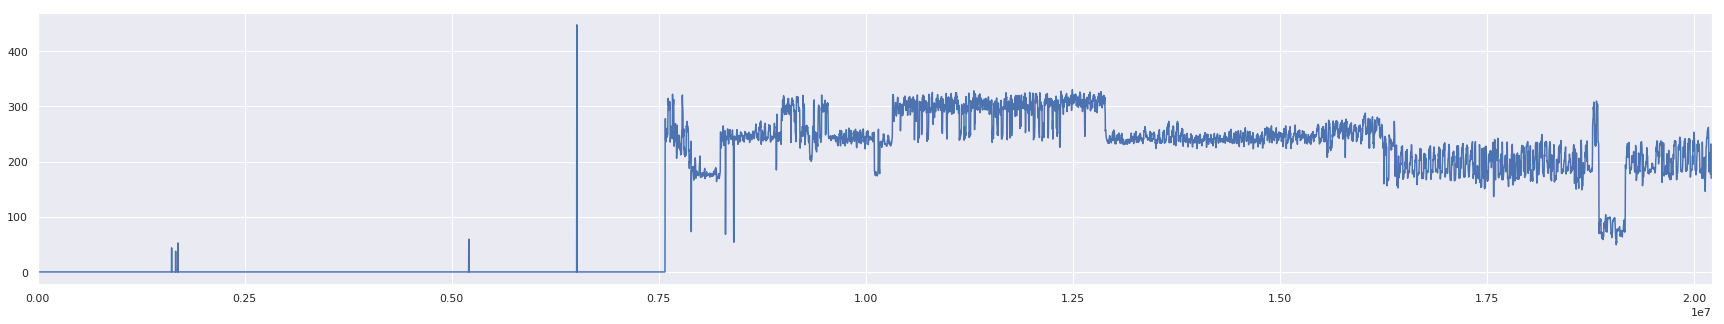

In [3]:
time = 'timestamp'
target = 'meter_reading'
building = 'building_id'
meter = 'meter'

SIZE = (30,5)

df = df[df[building]==0]
gc.collect();

df[target].plot(figsize=SIZE)
plt.show()

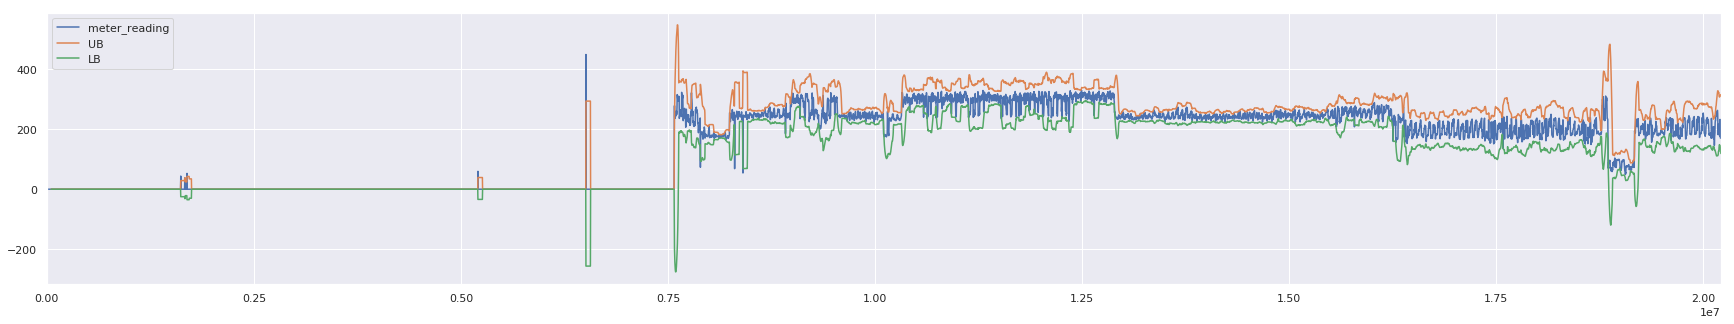

In [4]:
DAY = 24
WEEK = 7*DAY

df['MA_1'] = df[target].rolling(DAY).mean()
df['MD_1'] = df[target].rolling(DAY).std()

Z = 3
df['UB'] = df.MA_1 + Z * df.MD_1
df['LB'] = df.MA_1 - Z * df.MD_1

df[[target, 'UB', 'LB']].plot(figsize=SIZE)
plt.show()

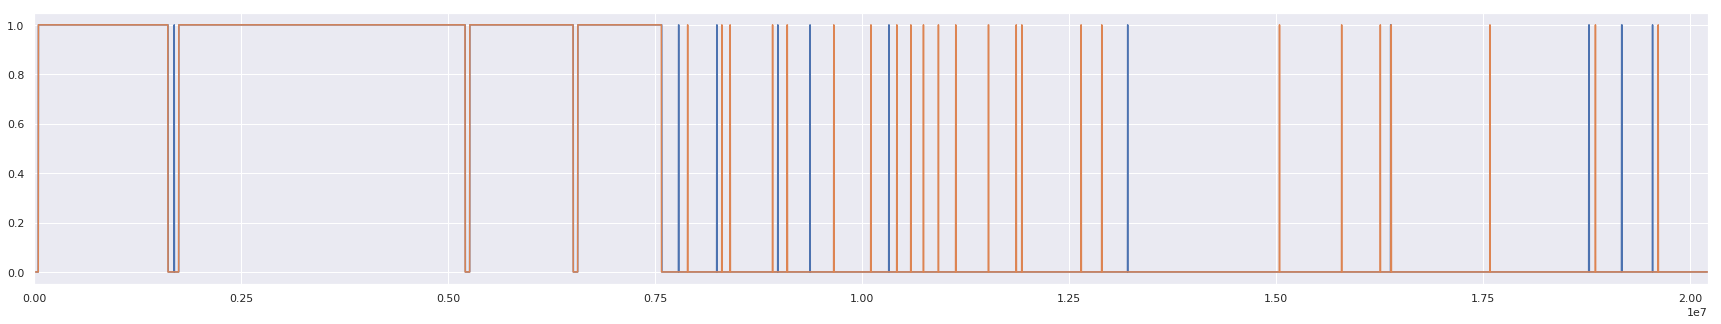

In [5]:
(df[target] >= df.UB).astype(np.int).plot(figsize=SIZE)
(df[target] <= df.LB).astype(np.int).plot(figsize=SIZE)
plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  


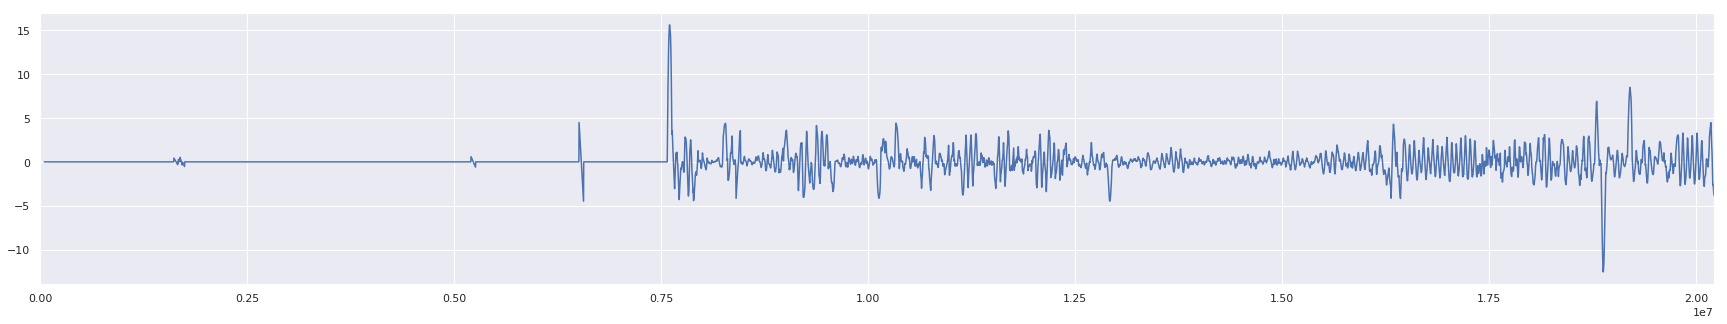

In [6]:
def slope(y):
    x = range(len(y))
    m, b = np.polyfit(x, y, 1)
    return m

df['slope_1'] = df[target].rolling(DAY).apply(lambda x: slope(x))

df['slope_1'].plot(figsize=SIZE)
plt.show()

0.0 +/- 0.6294669050221474
-1.7064082608695705
1.9918863478260864


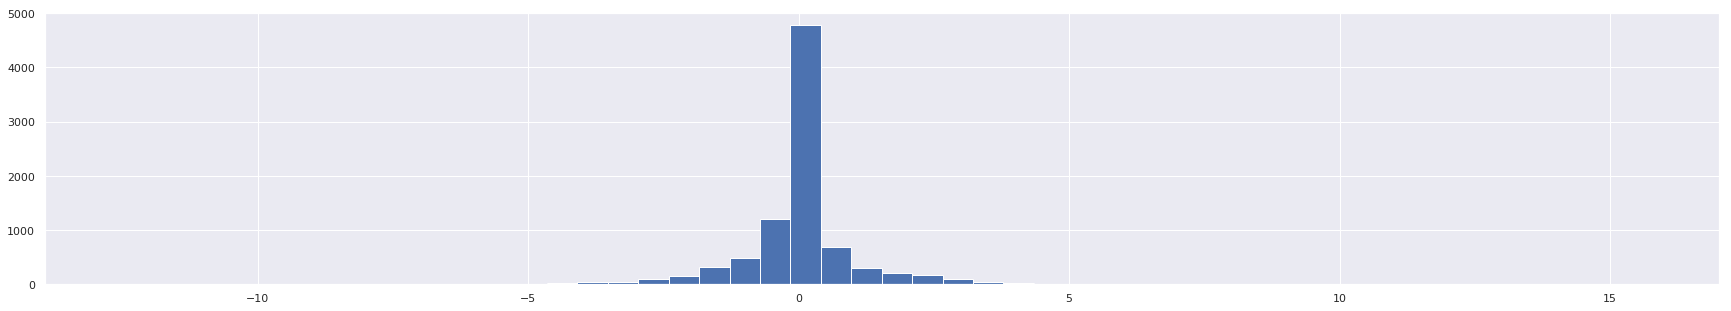

In [7]:
center = df['slope_1'].median()
spread = df['slope_1'].mad()
print(center, "+/-", spread)

print(df['slope_1'].quantile(q=.05))
print(df['slope_1'].quantile(q=.95))

df['slope_1'].hist(bins=50, figsize=SIZE)
plt.show()

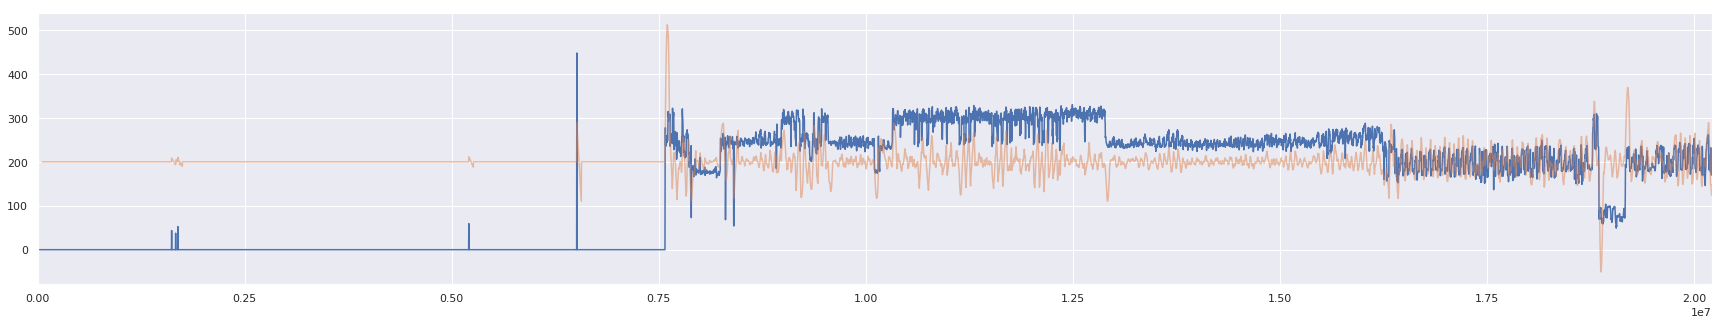

In [8]:
df[target].plot(figsize=SIZE)
(200+20*df['slope_1']).plot(figsize=SIZE, alpha=0.5)
plt.show()

In [9]:
from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft, fftfreq, rfft, irfft, ifft

In [10]:
x = np.arange(5)

fft(x)

array([10. +0.j        , -2.5+3.4409548j , -2.5+0.81229924j,
       -2.5-0.81229924j, -2.5-3.4409548j ])

In [11]:
# df[target].rolling(DAY).apply(lambda x: np.abs(fft(x)))

wkly_spectrum = []
for i in range(1,53):
    spectrum = np.abs(rfft(df[target].loc[i*WEEK:(i+1)*WEEK]))
    wkly_spectrum.append(spectrum)
    
for i in range(52):
    example = 20*np.log(wkly_spectrum[i]/wkly_spectrum[i].max())
    plt.figure(figsize=SIZE)
    sns.lineplot(1.0/24*np.array(range(len(example))), example)
    plt.show()

ValueError: Invalid number of FFT data points (0) specified.

In [12]:
df = df.reset_index()
gc.collect();
df.head()

,index,building_id,meter,timestamp,meter_reading,MA_1,MD_1,UB,LB,slope_1
0,0,0,0,2016-01-01 00:00:00,0.0,NaN,NaN,NaN,NaN,NaN
1,2301,0,0,2016-01-01 01:00:00,0.0,NaN,NaN,NaN,NaN,NaN
2,4594,0,0,2016-01-01 02:00:00,0.0,NaN,NaN,NaN,NaN,NaN
3,6893,0,0,2016-01-01 03:00:00,0.0,NaN,NaN,NaN,NaN,NaN
4,9189,0,0,2016-01-01 04:00:00,0.0,NaN,NaN,NaN,NaN,NaN
